In [1]:
import os

In [2]:
os.listdir("INDIAN_FOOD/Indian Food Images/Indian Food Images/")

['adhirasam',
 'aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'anarsa',
 'ariselu',
 'bandar_laddu',
 'basundi',
 'bhatura',
 'bhindi_masala',
 'biryani',
 'boondi',
 'butter_chicken',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chhena_kheeri',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chikki',
 'daal_baati_churma',
 'daal_puri',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'doodhpak',
 'double_ka_meetha',
 'dum_aloo',
 'gajar_ka_halwa',
 'gavvalu',
 'ghevar',
 'gulab_jamun',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kajjikaya',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'kofta',
 'kuzhi_paniyaram',
 'lassi',
 'ledikeni',
 'litti_chokha',
 'lyangcha',
 'maach_jhol',
 'makki_di_roti_sarson_da_saag',
 'malapua',
 'misi_roti',
 'misti_doi',
 'modak',
 'mysore_pak',
 'naan',
 'navrattan_korma',
 'palak_paneer',
 'paneer_butter_masala',
 'phirni',
 'pithe',
 'poha',
 'poornalu

In [3]:
Items=['adhirasam',
 'aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'anarsa',
 'ariselu',
 'bandar_laddu',
 'basundi',
 'bhatura',
 'bhindi_masala',
 'biryani',
 'boondi',
 'butter_chicken',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chhena_kheeri',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chikki',
 'daal_baati_churma',
 'daal_puri',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'doodhpak',
 'double_ka_meetha',
 'dum_aloo',
 'gajar_ka_halwa',
 'gavvalu',
 'ghevar',
 'gulab_jamun',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kajjikaya',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'kofta',
 'kuzhi_paniyaram',
 'lassi',
 'ledikeni',
 'litti_chokha',
 'lyangcha',
 'maach_jhol',
 'makki_di_roti_sarson_da_saag',
 'malapua',
 'misi_roti',
 'misti_doi',
 'modak',
 'mysore_pak',
 'naan',
 'navrattan_korma',
 'palak_paneer',
 'paneer_butter_masala',
 'phirni',
 'pithe',
 'poha',
 'poornalu',
 'pootharekulu',
 'qubani_ka_meetha',
 'rabri',
 'rasgulla',
 'ras_malai',
 'sandesh',
 'shankarpali',
 'sheera',
 'sheer_korma',
 'shrikhand',
 'sohan_halwa',
 'sohan_papdi',
 'sutar_feni',
 'unni_appam']

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen=ImageDataGenerator(rescale=1/255.)

In [7]:
train_dir="INDIAN_FOOD/Indian Food Images/Indian Food Images/"

In [8]:
train_data=datagen.flow_from_directory(train_dir,batch_size=32,seed=42,class_mode="categorical",target_size=(256,256))

Found 4000 images belonging to 80 classes.


In [9]:
len(train_data)

125

In [10]:
input_shape1=(1,256,256,3)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(80, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [16]:
model.fit(train_data,epochs=10,steps_per_epoch=len(train_data))

Epoch 1/10


125/125 [==============================] - 171s 1s/step - loss: 4.3592 - accuracy: 0.0170
Epoch 2/10
125/125 [==============================] - 135s 1s/step - loss: 4.0594 - accuracy: 0.0640
Epoch 3/10
125/125 [==============================] - 145s 1s/step - loss: 3.1059 - accuracy: 0.2553
Epoch 4/10
125/125 [==============================] - 153s 1s/step - loss: 1.3663 - accuracy: 0.6575
Epoch 5/10
125/125 [==============================] - 135s 1s/step - loss: 0.3924 - accuracy: 0.9153
Epoch 6/10
125/125 [==============================] - 143s 1s/step - loss: 0.1722 - accuracy: 0.9730
Epoch 7/10
125/125 [==============================] - 147s 1s/step - loss: 0.0815 - accuracy: 0.9883
Epoch 8/10
125/125 [==============================] - 145s 1s/step - loss: 0.0722 - accuracy: 0.9887
Epoch 9/10
125/125 [==============================] - 148s 1s/step - loss: 0.0617 - accuracy: 0.9905
Epoch 10/10
125/125 [==============================] - 148s 1s/step - loss: 0.0530 - accu

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("chapathi.jpeg")
img.shape

(900, 1200, 3)

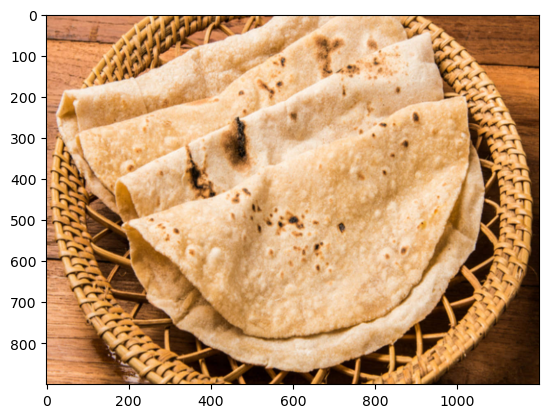

In [18]:
plt.imshow(img)

In [19]:
from PIL import Image

In [20]:
img_1=Image.open("chapathi.jpeg")

In [21]:
img_rescaled_size=img_1.resize(size=(256,256))

In [22]:
import numpy as np

In [23]:
img_rescale=np.asarray(img_rescaled_size)/255.

In [24]:
img_rescale.shape

(256, 256, 3)

In [25]:
p1=model.predict(img_rescale[np.newaxis,...])

1/1 [==============================] - 0s 267ms/step


'chapati'

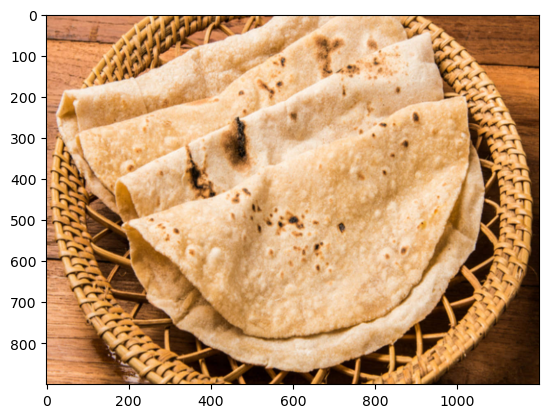

In [26]:
item=np.argmax(p1)
plt.imshow(img_1)
Items[item]

In [27]:
def image_name_result():
    img=Image.open("#imagefileaddress")
    img_reshaped=img.resize(size=(256,256))
    img_rescale=np.asarray(img_reshaped)/255
    img_predict=model.predict(img_rescale[np.newaxis,...])
    item=np.argmax(img_predict)
    print(Items[item]) 
    

In [28]:
#image_name_result()